In [1]:
import tensorflow as tf 

class mnistCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy')>0.99):
            print('Accuracy over 99%. Training finished.')
            self.model.stop_training = True 


In [11]:
def train():
    mnist = tf.keras.datasets.mnist

    (xTrain, yTrain), (xTest, yTest) = mnist.load_data()

    xTrain, xTest = xTrain/255.0, xTest/255.0

    yTrain = yTrain.astype("float32")
    yTest = yTest.astype("float32")

    #Validation samples
    xVal = xTrain[-10000:]
    yVal = yTrain[-10000:]
    
    xTrain = xTrain[:-10000]
    yTrain = yTrain[:-10000]

    callback = mnistCallback()
    
    model = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(input_shape=(28,28)),
            tf.keras.layers.Dense(512, activation=tf.nn.relu),
            tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

    model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(xTrain, yTrain, epochs=10, callbacks=[callback], validation_data=(xVal, yVal))

    return history


Epoch 1/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.2219 - accuracy: 0.9330 - val_loss: 0.1282 - val_accuracy: 0.9632
Epoch 2/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.0894 - accuracy: 0.9736 - val_loss: 0.0814 - val_accuracy: 0.9754
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0569 - accuracy: 0.9828 - val_loss: 0.0760 - val_accuracy: 0.9778
Epoch 4/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.0391 - accuracy: 0.9879 - val_loss: 0.0865 - val_accuracy: 0.9761
Epoch 5/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0302 - accuracy: 0.9904 - val_loss: 0.0741 - val_accuracy: 0.9772
Accuracy over 99%. Training finished.


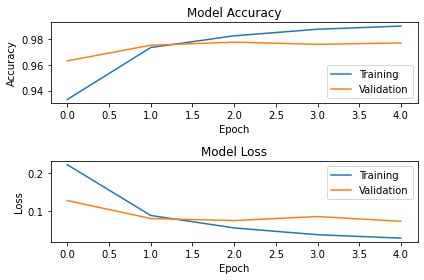

In [13]:
import matplotlib.pyplot as plt 

h = train()

plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')

# summarize history for loss

plt.subplot(212)
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.tight_layout()

plt.show()